In [1]:
import pandas as pd
%matplotlib inline


In [2]:
# API for retriving historic data for individual Stocks

# symbol = 'Ticker_Symbol(Ex. AAPL, MSFT)'
# url = 'http://download.macrotrends.net/assets/php/stock_data_export.php?t=' + symbol

# df = pd.read_csv(url, skiprows=14)
# df.columns = df.columns.str.strip()

# stock_price

In [3]:
# Part 1: Get the Data

df = pd.read_csv('historic_snp_data.csv')
df.columns = df.columns.str.strip()



In [5]:
# Part 2: Calculate the model inputs (Simple Moving Average, etc.)


df['% change'] = df['Close'].pct_change()
df['200 sma'] = df['Close'].rolling(window = 200).mean().round(5)
df['50 sma'] = df['Close'].rolling(window = 50).mean().round(5)


In [6]:
# Part 3: Model Criteria

df['Criteria 1'] = df['Close'] >= df['200 sma']
df['Criteria 2'] = (df['50 sma'] >= df['200 sma']) | df['Criteria 1'] == True



In [7]:
# Part 4: Calculate the Models

df['Buy and Hold'] = 100*(1+df['% change']).cumprod()
df['200 sma model'] = 100*(1+df['Criteria 1'].shift(1)*df['% change']).cumprod()
df['200 sma + crossover model'] = 100*(1+df['Criteria 2'].shift(1)*df['% change']).cumprod()


In [10]:
# Part 5: Calculate the Model's Returns

# 200 sma model's returns

years = (df['200 sma model'].count()+1-200)/252

start_model1 = df['200 sma model'].iloc[200]
end_model1 = df['200 sma model'].iloc[-1]
model1_average_return = (end_model1/start_model1)**(1/years)-1
print('200 Day Simple Moving Average model yields an average of', model1_average_return*100, '% per year')


# 200 sma + crossover model

start_model2 = df['200 sma + crossover model'].iloc[200]
end_model2 = df['200 sma + crossover model'].iloc[-1]
model2_average_return  = (end_model2/start_model2)**(1/years)-1
print('200 Day Simple Moving Average + crossover model yields an average of', model2_average_return*100, '% per year')


# Buy and Hold's returns

start_snp = df['Close'].iloc[200]
end_snp = df['Close'].iloc[-1]
snp_average_return = (end_snp/start_snp)**(1/years)-1
print('Buy and Hold yields an average of', snp_average_return*100, '% per year')




200 Day Simple Moving Average model yields an average of 6.575807708045023 % per year
200 Day Simple Moving Average + crossover model yields an average of 6.9704687730832715 % per year
Buy and Hold yields an average of 5.737308773973582 % per year


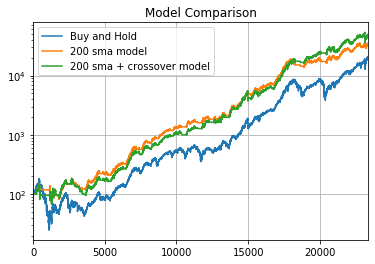

In [12]:
# Part 6: Plot the Models

df[['Buy and Hold', '200 sma model', '200 sma + crossover model']].plot(grid=True, kind='line', title='Model Comparison', logy=True)
